In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
path_data = r"C:\Users\LaurèneDAVID\Documents\Teaching\Educational_apps\App AI and DS HEC\app-hec-AI-DS\data\clustering\customer_segmentation.csv"

customer_data = pd.read_csv(path_data)
customer_data.drop(columns=["ID","Var_1","Segmentation", "Family_Size"], inplace=True)
customer_data = customer_data.dropna().iloc[:2000].reset_index(drop=True)

In [8]:
customer_data

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score
0,Male,No,22,No,Healthcare,1.0,Low
1,Female,Yes,67,Yes,Engineer,1.0,Low
2,Male,Yes,67,Yes,Lawyer,0.0,High
3,Male,Yes,56,No,Artist,0.0,Average
4,Male,No,32,Yes,Healthcare,1.0,Low
...,...,...,...,...,...,...,...
1995,Male,No,31,Yes,Artist,7.0,Low
1996,Female,No,20,No,Healthcare,0.0,Low
1997,Male,Yes,66,Yes,Entertainment,1.0,Average
1998,Male,Yes,37,Yes,Healthcare,1.0,Average


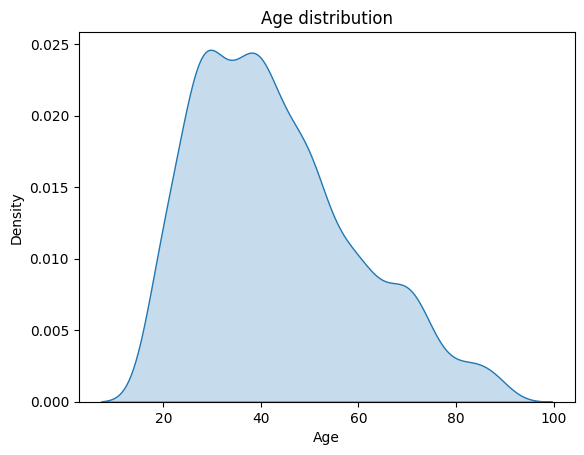

In [9]:
sns.kdeplot(data=customer_data, x="Age", fill="Age")
plt.title("Age distribution")
plt.show()

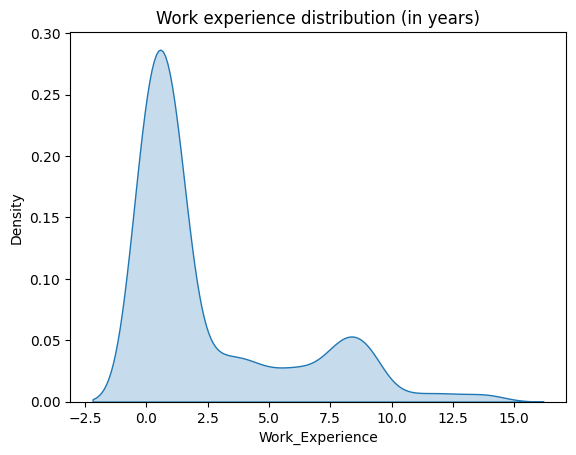

In [10]:
sns.kdeplot(data=customer_data, x="Work_Experience", fill="Work_Experience")
plt.title("Work experience distribution (in years)")
plt.show()

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler

# Split columns into categorical/numerical
binary_columns = ["Ever_Married", "Graduated", "Gender"]
cat_columns = customer_data.select_dtypes(include=["object"]).columns
cat_columns = [col for col in cat_columns if col not in binary_columns]
num_columns = customer_data.select_dtypes(include=["int64", "float64"]).columns

# Build data processing pipeline
ct = ColumnTransformer(
    [("binary", OrdinalEncoder(), binary_columns),
     ("categorical", OneHotEncoder(sparse_output=False), cat_columns),
     ("numerical", MinMaxScaler(), num_columns)])

X = ct.fit_transform(customer_data)

In [12]:
columns_transform = [col.split("__")[1] for col in ct.get_feature_names_out()]

In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

list_nb_clusters = np.arange(2,11)
dict_labels = dict()
list_scores = []

for n in list_nb_clusters:
    kmeans = KMeans(n_clusters=n, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    
    dict_labels[f"{n} clusters"] = labels
    list_scores.append(score)

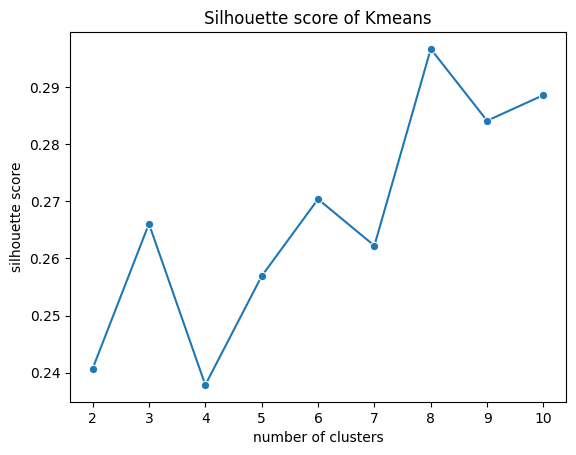

In [50]:
customer_seg_results = pd.DataFrame({"nb_clusters":list_nb_clusters,
                                     "scores":list_scores})

sns.lineplot(data=customer_seg_results, x="nb_clusters", y="scores", marker="o")
plt.xlabel("number of clusters")
plt.ylabel("silhouette score")
plt.title("Silhouette score of Kmeans")
plt.show()

In [51]:
dict_labels

{'2 clusters': array([1, 1, 0, ..., 0, 0, 0]),
 '3 clusters': array([0, 0, 2, ..., 1, 1, 1]),
 '4 clusters': array([3, 1, 0, ..., 2, 2, 2]),
 '5 clusters': array([1, 3, 4, ..., 0, 0, 0]),
 '6 clusters': array([5, 2, 0, ..., 4, 4, 4]),
 '7 clusters': array([2, 5, 6, ..., 0, 0, 4]),
 '8 clusters': array([4, 6, 5, ..., 0, 0, 3]),
 '9 clusters': array([5, 2, 1, ..., 6, 6, 3]),
 '10 clusters': array([1, 9, 7, ..., 4, 4, 0])}

In [52]:
customer_data.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score'],
      dtype='object')

In [55]:
customer_data_labels = customer_data.copy()
customer_data_labels["labels"] = dict_labels["8 clusters"]

c:\Users\LaurèneDAVID\Documents\Teaching\Educational_apps\VENV_teaching\venv-app-ai-hec\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


ValueError: Could not interpret value `count` for `x`. Value is a string, but `data` was not passed.

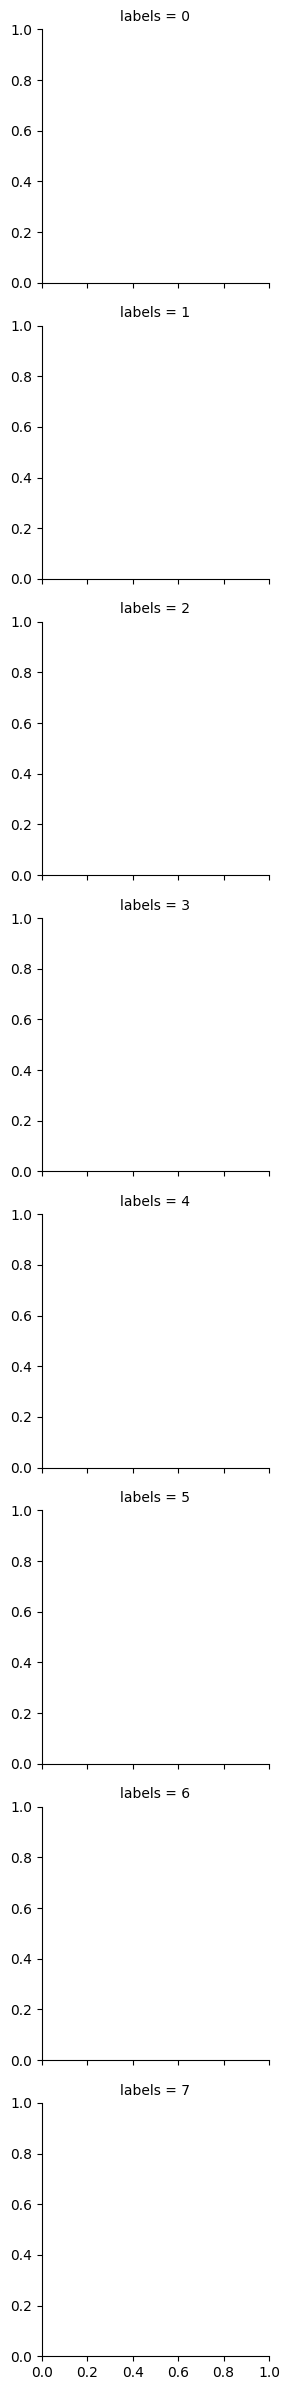

In [71]:
df_plot = customer_data_labels.groupby("labels")["Profession"].value_counts().to_frame().reset_index()

plt.

In [62]:
customer_data_labels[cat_columns + binary_columns + ["labels"]].groupby("labels").apply(lambda x: x.mode())

,,Profession,Spending_Score,Ever_Married,Graduated,Gender,labels
labels,,,,,,,
0,0,Entertainment,Average,Yes,Yes,Male,0
1,0,Doctor,Low,No,No,Female,1
2,0,Artist,Low,No,Yes,Female,2
3,0,Artist,Average,Yes,Yes,Male,3
4,0,Healthcare,Low,No,No,Male,4
5,0,Executive,High,Yes,Yes,Male,5
6,0,Engineer,Low,Yes,No,Female,6
7,0,Entertainment,Low,Yes,Yes,Male,7


<Axes: xlabel='Age', ylabel='Work_Experience'>

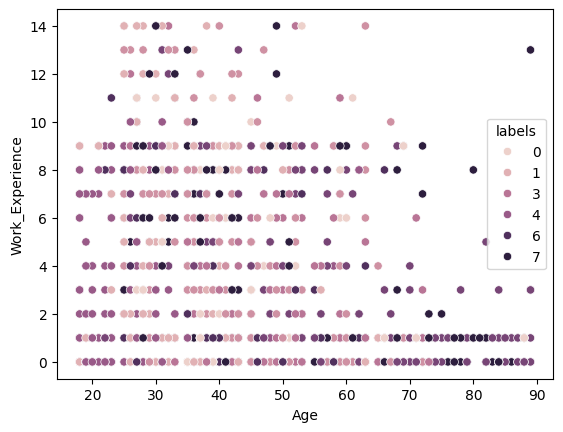

In [54]:
sns.scatterplot(data=customer_data_labels, x="Age", y="Work_Experience", hue="labels")

In [62]:
labels = kmeans.labels_
labels

array([2, 0, 1, ..., 1, 1, 1])